<h1 align='center'>Mobile Apps: Partial Environmental Analysis</h1>

<h2>Contents</h2>
<ol>
    <li><a href='#results'>Summary of Results</a></li>
    <li><a href='#source'>Data Source and Discussion</a></li>
    <li><a href='#pre'>Data Preprocessing</a></li>
    <li><a href='#common'>Most Common Apps by Genre</a></li>
    <li><a href='#popApp'>Most Popular Apps by Genre: App Store </a></li>
    <li><a href='#popGoogle'>Most Popular Apps by Genre: Google Play </a></li>
    
</ol>



<a id='results'></a><h2>Summary of Results</h2>

From the perspective of gaps in market offerings that a new development company could leverage to launch a successful initial product, we aim in this project to understand trends in popular mobile apps.  We will focus on behavior in the Google Play store and Apple iOS App store, and we will limit our attention to apps that are free to download and install.  Broadly speaking, we will not account for political, economic, social, or legal factors, hence only performing part of the environmental analysis that such a company should complete.

We will build our work on the assumption that visibility in the respective app stores is essential to success.  And, moreover, that visibility is a byproduct of algorithms that favor already popular apps.  We will utilize included data on app genre and categorization so that our hypthetical development company may focus on some subset of the app store that is popular with users but also possesses potential for small companies to get their footing.  For example, we will find that some categories are entirely dominated by large corporations, against which a small company would never be able to outspend nor outcompute.

Ultimately, we will identify three areas in the Apple store (reference, health and beauty, and catalogs) and five areas in the Google store (health and fitness, house and home, art and design, personalization, and tools) in which a novel idea has the room to rise to a prominent position in the "leaderboards."  The reasoning for including these and exluding other popular categories is included in the course of our discussion.

note: I acknowledge that my hypothetical premise of a new company looking to chase a trend to build an app is almost certainly not a very good recipe for the longevity of the company.  If you prefer, please replace this framework for one where an established company is trying to understand the structure of the marketplace and why their existing app is not being recommended often enough.

<a id='source'></a><h2>Data Source and Discussion</h2>

The data come from two sources: data on the <a href='https://www.kaggle.com/lava18/google-play-store-apps' target='_blank'>Google Play Store</a> includes 10841 observations and data on the <a href='https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps' target='_blank'>Apple iOS App Store</a> includes 7197 observations.

Each data set possesses its own schema, as can be seen by the given columns:

In [1]:
#setup our standard environment and a dataframe of the dataset
import pandas as pd
import numpy as np

In [2]:
google_raw = pd.read_csv('googleplaystore.csv')
apple_raw = pd.read_csv('AppleStore.csv')

In [3]:
google_raw.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
apple_raw.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

As such, our first task is to clean any problem points and designate those columns that will be useful for our present purposes.

<a id='pre'></a><h2>Data Preprocessing</h2>

First, if we inspect the App variable of the Google dataset, we find that there are numerous duplicate apps.  More precisely, the number of duplicate apps is:

In [5]:
len(google_raw['App'])-len(google_raw['App'].unique())

1181

If we inspect some of these duplicates:

In [6]:
google_raw[google_raw.duplicated(subset=['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [7]:
google_raw[google_raw['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [8]:
google_raw[google_raw['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


We find that it is predominantly the number of reviews and just simple duplicate entry that accounts for the duplication.  As such, we will remove the duplicate observations through the built-in function: 

In [9]:
google_raw = google_raw.drop_duplicates(subset=['App'])

In [10]:
#quick sanity check
len(google_raw['App'])-len(google_raw['App'].unique())

0

Next, we will limit our attention to apps in English.  We will do so through a function that inspects the frequency of non-ASCII characters and then apply this to our App variable. Note: ultimately, this will remove 30 apps.

In [11]:
def isAscii(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

In [12]:
google_raw = google_raw[google_raw['App'].apply(isAscii)]

Our final piece of clean-up for the Google data is to filter out the paid apps, of which there are 753.

In [13]:
google_clean = google_raw[google_raw['Type']== 'Free']

We complete these same steps for the Apple data, without additional comment.

In [14]:
len(apple_raw['track_name'])-len(apple_raw['track_name'].unique())

2

In [15]:
apple_raw = apple_raw.drop_duplicates(subset=['track_name'])

In [16]:
apple_raw = apple_raw[apple_raw['track_name'].apply(isAscii)]

In [17]:
apple_clean = apple_raw[apple_raw['price']== 0]

<a id='common'></a><h2>Most Common Apps by Genre</h2>

We are interested in identifying the most successful apps on both markets.  With our data now in a clean and usable format, we start this analysis by identifying the most common genres for each market.  We accomplish this by looking at the frequency occurence of each genre.

In [18]:
#first we can inspect the counts
apple_clean['prime_genre'].value_counts()

Games                1872
Entertainment         254
Photo & Video         160
Education             118
Social Networking     106
Shopping               84
Utilities              81
Sports                 69
Music                  66
Health & Fitness       65
Productivity           56
Lifestyle              51
News                   43
Travel                 40
Finance                36
Weather                28
Food & Drink           26
Reference              18
Business               17
Book                   14
Medical                 6
Navigation              6
Catalogs                4
Name: prime_genre, dtype: int64

In [19]:
#a simple adjustment returns these as percentages of the total
apple_clean['prime_genre'].value_counts(normalize=True)

Games                0.581366
Entertainment        0.078882
Photo & Video        0.049689
Education            0.036646
Social Networking    0.032919
Shopping             0.026087
Utilities            0.025155
Sports               0.021429
Music                0.020497
Health & Fitness     0.020186
Productivity         0.017391
Lifestyle            0.015839
News                 0.013354
Travel               0.012422
Finance              0.011180
Weather              0.008696
Food & Drink         0.008075
Reference            0.005590
Business             0.005280
Book                 0.004348
Medical              0.001863
Navigation           0.001863
Catalogs             0.001242
Name: prime_genre, dtype: float64

Our results indicate that, amongst free English-langauge apps on the App store, games consititute more than half of the total.  More generally, apps oriented towards amusement (e.g., games, entertainment, social networking, sports) comprise about 80% of the market, while apps with practical utility (e.g., education, shopping, utilities, productivity, lifestyle) comprise the remaining 20%.  However, more work will be needed below as these counts do not indicate the number of users.

For the Google Play store, we find:

In [20]:
google_clean['Category'].value_counts(normalize=True)

FAMILY                 0.184404
GAME                   0.098747
TOOLS                  0.084415
BUSINESS               0.045932
LIFESTYLE              0.039048
PRODUCTIVITY           0.038935
FINANCE                0.037016
MEDICAL                0.035210
SPORTS                 0.033969
PERSONALIZATION        0.033179
COMMUNICATION          0.032389
HEALTH_AND_FITNESS     0.030809
PHOTOGRAPHY            0.029455
NEWS_AND_MAGAZINES     0.027988
SOCIAL                 0.026634
TRAVEL_AND_LOCAL       0.023361
SHOPPING               0.022458
BOOKS_AND_REFERENCE    0.021442
DATING                 0.018621
VIDEO_PLAYERS          0.017831
MAPS_AND_NAVIGATION    0.013994
EDUCATION              0.012865
FOOD_AND_DRINK         0.012414
ENTERTAINMENT          0.011285
LIBRARIES_AND_DEMO     0.009367
AUTO_AND_VEHICLES      0.009254
HOUSE_AND_HOME         0.008351
WEATHER                0.008013
EVENTS                 0.007110
ART_AND_DESIGN         0.006771
PARENTING              0.006546
COMICS  

indicating a drastically different marketplace.  There is a significantly greater emphasis on labelling apps intended for children (i.e., family).  Games are significantly less represented.  Amusement apps, more generally, occupy either about 22% or 40%, depending on whether we include the family category.  And, practical utility apps occupy about 60% of the market.

Overall, because the markets utilize different schemas and the number of apps does not indicate the number of users, we need to extend this analysis.

<a id='popApp'></a><h2>Most Popular Apps by Genre: App Store</h2>

One measure of popularity would be the average number of installs for each app genre.  Unfortunately, this information is not available in the Apple data, but we can use the number of user ratings as a proxy.  Doing so does have a number of hidden variables (e.g.,user enthusiasm, user happiness, user expectations, genre variation), so our results should be taken with some hesitation.

In [21]:
#group by genre, limit results to rating count, generate median
apple_clean.groupby(by="prime_genre")['rating_count_tot'].median().sort_values(ascending=False)

prime_genre
Productivity         8737.5
Navigation           8196.5
Reference            6614.0
Shopping             5936.0
Social Networking    4199.0
Music                3850.0
Health & Fitness     2459.0
Photo & Video        2206.0
Finance              1931.0
Sports               1628.0
Food & Drink         1490.5
Catalogs             1229.0
Entertainment        1197.5
Business             1150.0
Lifestyle            1111.0
Utilities            1110.0
Games                 904.0
Travel                798.5
Education             606.5
Medical               566.5
Book                  421.5
News                  373.0
Weather               289.0
Name: rating_count_tot, dtype: float64

In [22]:
apple_clean.groupby(by="prime_genre")['rating_count_tot'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,14.0,39758.500000,71324.552101,0.0,2.25,421.5,61044.75,252076.0
Business,17.0,7491.117647,10937.996228,11.0,392.00,1150.0,8623.00,38681.0
Catalogs,4.0,4004.000000,6279.618354,213.0,376.50,1229.0,4856.50,13345.0
Education,118.0,7003.983051,21768.784453,0.0,72.25,606.5,3929.25,162701.0
Entertainment,254.0,14029.830709,38978.940379,0.0,190.50,1197.5,7534.00,308844.0
Finance,36.0,31467.944444,59291.260242,0.0,72.00,1931.0,26411.75,233270.0
Food & Drink,26.0,33333.923077,79117.344084,1.0,60.25,1490.5,9406.25,303856.0
Games,1872.0,22812.924679,94903.404955,0.0,127.75,904.0,7424.50,2130805.0
Health & Fitness,65.0,23298.015385,79689.893021,0.0,115.00,2459.0,7754.00,507706.0


A box and whisker plot is a little easier to see the above (because of the difference in scale I won't plot all of them)

<AxesSubplot:>

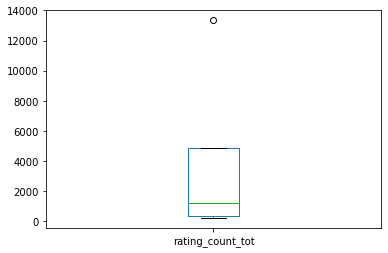

In [23]:
apple_clean[apple_clean['prime_genre']== 'Catalogs'].boxplot(grid=False,column='rating_count_tot')

But, if we focus on one of the genres with a large standard deviation, it becomes rather ineffective.

<AxesSubplot:>

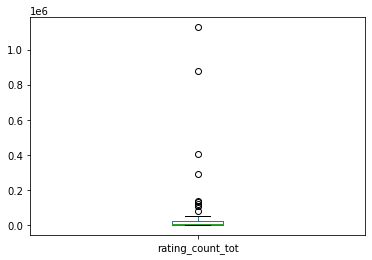

In [24]:
apple_clean[apple_clean['prime_genre']== 'Music'].boxplot(grid=False,column='rating_count_tot')

This is because there are substantial outliers in 6 genres (Music, Navigation, Photo & Video, Reference, Social Networking, and Weather).  It would be helpful to identify which apps are the outliers for these genres.

In [25]:
#filter to chosen genre, limit results to two columns, sort the values, and limit results to the top five
apple_clean[apple_clean['prime_genre'] == 'Music'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head()

,track_name,rating_count_tot
4,Pandora - Music & Radio,1126879
8,Spotify Music,878563
35,"Shazam - Discover music, artists, videos & lyrics",402925
60,iHeartRadio – Free Music & Radio Stations,293228
151,SoundCloud - Music & Audio,135744


In [26]:
apple_clean[apple_clean['prime_genre'] == 'Navigation'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head()

,track_name,rating_count_tot
49,"Waze - GPS Navigation, Maps & Real-time Traffic",345046
130,Google Maps - Navigation & Transit,154911
881,Geocaching®,12811
1633,CoPilot GPS – Car Navigation & Offline Maps,3582
3987,ImmobilienScout24: Real Estate Search in Germany,187


In [27]:
apple_clean[apple_clean['prime_genre'] == 'Photo & Video'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head()

,track_name,rating_count_tot
1,Instagram,2161558
54,Snapchat,323905
65,"YouTube - Watch Videos, Music, and Live Streams",278166
166,Pic Collage - Picture Editor & Photo Collage M...,123433
167,Funimate video editor: add cool effects to videos,123268


In [28]:
apple_clean[apple_clean['prime_genre'] == 'Reference'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head()

,track_name,rating_count_tot
6,Bible,985920
90,Dictionary.com Dictionary & Thesaurus,200047
335,Dictionary.com Dictionary & Thesaurus for iPad,54175
551,Google Translate,26786
715,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",18418


In [29]:
apple_clean[apple_clean['prime_genre'] == 'Social Networking'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head()

,track_name,rating_count_tot
0,Facebook,2974676
5,Pinterest,1061624
43,Skype for iPhone,373519
48,Messenger,351466
51,Tumblr,334293


In [30]:
apple_clean[apple_clean['prime_genre'] == 'Weather'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head()

,track_name,rating_count_tot
22,"The Weather Channel: Forecast, Radar & Alerts",495626
89,The Weather Channel App for iPad – best local ...,208648
95,"WeatherBug - Local Weather, Radar, Maps, Alerts",188583
133,MyRadar NOAA Weather Radar Forecast,150158
138,AccuWeather - Weather for Life,144214


We can infer from these results that new applications trying to enter the marketplace via one of these genres will have a difficult time pulling attention away from the juggernauts, with the possible exception of reference, which we discuss below.  The genres besides these six may provide a more reasonable path to notoriety via recommentation algorithms that leverage "most popular" type metrics, and we inspect them below.

If we inspect the reference genre: 

In [31]:
apple_clean[apple_clean['prime_genre'] == 'Reference'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head(15)

,track_name,rating_count_tot
6,Bible,985920
90,Dictionary.com Dictionary & Thesaurus,200047
335,Dictionary.com Dictionary & Thesaurus for iPad,54175
551,Google Translate,26786
715,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",18418
738,New Furniture Mods - Pocket Wiki & Game Tools ...,17588
757,Merriam-Webster Dictionary,16849
913,Night Sky,12122
1106,City Maps for Minecraft PE - The Best Maps for...,8535
1451,LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...,4693


We see that, while this genre does contain outliers, they are unique in the service they provide and do not serve the broader needs of the category.  For the most part, once one moves beyond the top five apps, the remaining applications focus on reference features for popular media.  This creates some potential for a new app to exist in this space without worrying about pulling users away from the christian bible or dictionaries.  Secondly, based on the title offerings, there seems to be heavy correlation here with the popularity of the family genre, giving some indication of what topics have the potential to be successful within this genre.  Finally, it is reasonable to assume that such apps allow for more on-screen time and there are reasonable methods that can be employed to increase user engagement (e.g., tip of the day, rare tidbits, top 10 secrets).  All of the above in conjunction with our initial results in this section establishing the popularity of reference may result in an advantage for new developers to enter this space.  Contrast this to, say, weather, which is popular but is also dominated by outliers, has very little latitude for a unique value proposition, and lends itself to quick checks.

Next, we see that productivity is rather evenly distributed and completely dominated by large tech companies, making it a very poor choice for a small developement company.

In [32]:
apple_clean[apple_clean['prime_genre'] == 'Productivity'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head(15)

,track_name,rating_count_tot
123,Evernote - stay organized,161065
150,"Gmail - email by Google: secure, fast & organized",135962
168,iTranslate - Language Translator & Dictionary,123215
186,Yahoo Mail - Keeps You Organized!,113709
291,Google Docs,64259
306,Google Drive - free online storage,59255
352,Dropbox,49578
361,Microsoft Word,47999
412,Microsoft OneNote,39638
475,Microsoft Outlook - email and calendar,32807


In shopping and food & drink, we observe that popular apps are predominantly tethered to an external store, making them also poor choices for our developers.

In [33]:
apple_clean[apple_clean['prime_genre'] == 'Shopping'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head(15)

,track_name,rating_count_tot
30,"Groupon - Deals, Coupons & Discount Shopping App",417779
71,"eBay: Best App to Buy, Sell, Save! Online Shop...",262241
142,Wish - Shopping Made Fun,141960
157,shopkick - Shopping Rewards & Discounts,130823
162,"Amazon App: shop, scan, compare, and read reviews",126312
198,Target,108131
212,"Zappos: shop shoes & clothes, fast free shipping",103655
235,"Walgreens – Pharmacy, Photo, Coupons and Shopping",88885
251,Best Buy,80424
274,"Walmart: Free 2-Day Shipping,* Easy Store Shop...",70286


Sports is also, as is to be expected, dominated by the large brands.  It is very unlikely that an individual developer would be able to keep pace with the data collection and analysis that these organizations are able to perform, making this a poor choice.

In [34]:
apple_clean[apple_clean['prime_genre'] == 'Sports'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head(15)

,track_name,rating_count_tot
62,"ESPN: Get scores, news, alerts & watch live sp...",290996
94,Yahoo Fantasy Sports,190670
125,WatchESPN,159735
135,The Masters Tournament,148160
147,"Yahoo Sports - Teams, Scores, News & Highlights",137951
289,ESPN Fantasy Football Baseball Basketball Hockey,64925
305,"CBS Sports App - Sports Scores, News, Stats, W...",59639
313,FOX Sports Mobile,57500
334,2016 U.S. Open Golf Championship,54192
368,NBC Sports,47172


Health & Fitness does provide reasonable opportunity.  It is fairly evenly distributed at the top and provides a wide array of functionality to the user.  There is potential for a unique idea to establish itself within such a context.

In [35]:
apple_clean[apple_clean['prime_genre'] == 'Health & Fitness'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head(15)

,track_name,rating_count_tot
20,Calorie Counter & Diet Tracker by MyFitnessPal,507706
42,Lose It! – Weight Loss Program and Calorie Cou...,373835
149,Weight Watchers,136833
209,Sleep Cycle alarm clock,104539
231,Fitbit,90496
338,Period Tracker Lite,53620
463,Nike+ Training Club - Workouts & Fitness Plans,33969
545,Plant Nanny - Water Reminder with Cute Plants,27421
758,Sworkit - Custom Workouts for Exercise & Fitness,16819
860,Clue Period Tracker: Period & Ovulation Tracker,13436


Finally, catalogs might provide some opportunity, under the right circumstances.  Because there are so few apps, despite it being a less popular genre, there is some room for a free app to be noteworthy.  However, such apps seem to require either substantial technical implemenation or a large offering of options, both of which will substantially increase the development time.

In [36]:
apple_clean[apple_clean['prime_genre'] == 'Catalogs'][['track_name','rating_count_tot']].sort_values(by=['rating_count_tot'], ascending=False).head(15)

,track_name,rating_count_tot
862,CPlus for Craigslist app - mobile classifieds,13345
2028,DRAGONS MODS FREE for Minecraft PC Game Edition,2027
3276,Face Swap and Copy Free – Switch & Fusion Face...,431
3891,Ringtone Remixes - Marimba Remix Ringtones,213


Ultimately, we have identified three areas (Reference, Health & Beauty, and Catalogs) where new developers may aim to gain visibility within the marketplace.

Closing Caveat: there is, of course, the idea that any developer is able to establish themselves with a succificiently unique value proposition, and the above analysis does not prohibit such a possibility.  We are predominantly concerned with how they can establish visibility within each genre.

<a id='popGoogle'></a><h2>Most Popular Apps by Genre: Google Play</h2>

The Google data contain information on the number of installs (which seems like a reasonable metric on popularity, but could be improved if we knew the rate of duplicate installation by users), but we can see that it doesn't provide fine detail:

In [38]:
google_clean['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '500+', '100+', '50+',
       '10+', '1+', '5+', '0+'], dtype=object)

Because we aren't able to establish ordinality there will be room for improvement with our results, but these results will allow us to identify any trends within the most popular apps as a single category.  For such purposes, we will identify each category with its minimum (e.g., associate \[10k,50k) to 10k) and convert to a numeric data type to allow for computations.

In [45]:
google_clean.iloc[:,5] = google_clean.iloc[:,5].apply(lambda x: x.replace(',', '').replace('+', ''))

In [51]:
google_clean.iloc[:,5] = pd.to_numeric(google_clean.iloc[:,5], downcast="float")

Now we can continue as we did with the Apple data. 

In [53]:
google_clean.groupby(by="Category")['Installs'].median().sort_values(ascending=False)

Category
ENTERTAINMENT          3000000.0
WEATHER                1000000.0
VIDEO_PLAYERS          1000000.0
EDUCATION              1000000.0
SHOPPING               1000000.0
GAME                   1000000.0
PHOTOGRAPHY            1000000.0
COMMUNICATION           500000.0
FOOD_AND_DRINK          500000.0
HEALTH_AND_FITNESS      500000.0
HOUSE_AND_HOME          500000.0
ART_AND_DESIGN          100000.0
TRAVEL_AND_LOCAL        100000.0
MAPS_AND_NAVIGATION     100000.0
AUTO_AND_VEHICLES       100000.0
PARENTING               100000.0
PERSONALIZATION         100000.0
PRODUCTIVITY            100000.0
SOCIAL                  100000.0
FAMILY                  100000.0
COMICS                  100000.0
SPORTS                  100000.0
TOOLS                   100000.0
BEAUTY                   50000.0
BOOKS_AND_REFERENCE      50000.0
NEWS_AND_MAGAZINES       50000.0
DATING                   10000.0
FINANCE                  10000.0
LIBRARIES_AND_DEMO       10000.0
LIFESTYLE                10000.0
M

Based on some of the reasoning we did with Apple data, there are a few categories we can quickly exclude: Weather (as discussed above), video players (technical competition, as discussed above), education (domain expertise), shopping and food/drink (brick-and-mortar requirement, as discussed above), photography (large tech domination, domain expertise), sports (as discussed above).

While Entertainment is very popular, it is dominated by very large streaming services (which would be far too difficult for a small company to try and tackle) and apps that are oriented towards children.  It is theoretically possible for a small company to get a foothold in the latter consideration, but it would require substantial investments in art, design, and domain expertise in children's entertainment.  As such, this would only be a fruitful path for our hypothetical company if they wanted to focus on media for children and build out the relevant departments.

In [55]:
google_clean[google_clean['Category'] == 'ENTERTAINMENT'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
865,Google Play Games,1.000000e+09
855,Netflix,1.000000e+08
888,IMDb Movies & TV,1.000000e+08
893,Talking Ben the Dog,1.000000e+08
874,Talking Angela,1.000000e+08
866,Hotstar,1.000000e+08
889,Twitch: Livestream Multiplayer Games & Esports,5.000000e+07
879,Talking Ginger 2,5.000000e+07
892,PlayStation App,5.000000e+07
886,Amazon Prime Video,5.000000e+07


We can see that the game category has a rather parallel difficulty to the children's entertainment apps.  Unless our hypothetical development company seeks to work in exclusivly game development and populate functional art and design departments, opportunities are limited here.

In [56]:
google_clean[google_clean['Category'] == 'GAME'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
1654,Subway Surfers,1.000000e+09
1655,Candy Crush Saga,5.000000e+08
1722,My Talking Tom,5.000000e+08
1661,Temple Run 2,5.000000e+08
1662,Pou,5.000000e+08
1758,Hungry Shark Evolution,1.000000e+08
5950,Banana Kong,1.000000e+08
6554,Skater Boy,1.000000e+08
9166,Modern Combat 5: eSports FPS,1.000000e+08
1781,Trivia Crack,1.000000e+08


Health and Fitness, in contrast to the Apple data, is rather homogeneous, consisting of various iterations of tracking applications.  This may indicate a gap that could be filled, or it could point to a substantial difference in how the two markets operate.  We will mark this as a potential category, but we will need to do future work that inspects if the difference in categorization accounts for the difference in app variety between the two data sets.

In [57]:
google_clean[google_clean['Category'] == 'HEALTH_AND_FITNESS'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
5596,Samsung Health,500000000.0
1360,Period Tracker - Period Calendar Ovulation Tra...,100000000.0
1286,Calorie Counter - MyFitnessPal,50000000.0
1256,Home Workout - No Equipment,10000000.0
1344,Headspace: Meditation & Mindfulness,10000000.0
1283,Garmin Connect™,10000000.0
1361,Period Tracker Clue: Period and Ovulation Tracker,10000000.0
1357,Period Tracker,10000000.0
1289,Endomondo - Running & Walking,10000000.0
1292,Runkeeper - GPS Track Run Walk,10000000.0


House and Home contains some potential in the design aspects (I assume rental/sales aggregators would be difficult to gain traction against).  If we combine this with our observations from the reference category in the apple data, there may be room here to focus on or partner with the correct brand to create a focused app with a pre-existing user base.

In [58]:
google_clean[google_clean['Category'] == 'HOUSE_AND_HOME'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
1446,Zillow: Find Houses for Sale & Apartments for ...,10000000.0
1454,Trulia Real Estate & Rentals,10000000.0
1449,Realtor.com Real Estate: Homes for Sale and Rent,10000000.0
4205,tinyCam Monitor FREE,10000000.0
1456,Houzz Interior Design Ideas,10000000.0
1470,DaBang - Rental Homes in Korea,5000000.0
1465,Trulia Rent Apartments & Homes,5000000.0
1482,Alfred Home Security Camera,5000000.0
1450,Real Estate sale & rent Trovit,5000000.0
1453,"CYANOGEN. Rent, buy an apartment, a room, a co...",1000000.0


Art and Design certainly is dominated by technical implementations that would be hard for a small company to compete with.  But, like House and Home above, apps like Tattoo Name and Garden Coloring indicate that niche subjects may be able to get a foothold in this category.  Of course, how to identify the correct niche so that the dice roll is guaranteed to be a success is beyond my expertise.

In [59]:
google_clean[google_clean['Category'] == 'ART_AND_DESIGN'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
3,Sketch - Draw & Paint,50000000.0
42,Textgram - write on photos,10000000.0
45,"Canva: Poster, banner, card maker & graphic de...",10000000.0
19,ibis Paint X,10000000.0
12,Tattoo Name On My Photo Editor,10000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0
18,FlipaClip - Cartoon animation,5000000.0
37,Floor Plan Creator,5000000.0
7,Infinite Painter,1000000.0
8,Garden Coloring Book,1000000.0


Travel and local would be very difficult for a small company to break into.  Certainly, there may be local apps that could gain traction in a focused locality. But, by definition, these could never be large, break-out applications.

In [60]:
google_clean[google_clean['Category'] == 'TRAVEL_AND_LOCAL'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
3127,Google Street View,1.000000e+09
3117,Maps - Navigate & Explore,1.000000e+09
3121,Google Earth,1.000000e+08
3112,Booking.com Travel Deals,1.000000e+08
3115,TripAdvisor Hotels Flights Restaurants Attract...,1.000000e+08
3103,trivago: Hotels & Travel,5.000000e+07
3125,VZ Navigator,5.000000e+07
9833,MAPS.ME – Offline Map and Travel Navigation,5.000000e+07
3151,2GIS: directory & navigator,5.000000e+07
3130,Goibibo - Flight Hotel Bus Car IRCTC Booking App,1.000000e+07


The peronalization and tools categories appear to be rather haphazard grab-bags of add-on features.  Some of these would require large catalogs to compete against (e.g., Backgrounds HD).  The antivirus applications would provide the same technical domination that we have seen numerous times above.  But, given the correct novel add-on feature, there does seem to be room here to gain some traction.  Hence, we will mark them as possibilities.

In [62]:
google_clean[google_clean['Category'] == 'PERSONALIZATION'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
3446,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",100000000.0
4474,Parallel Space - Multiple accounts & Two face,100000000.0
3354,ZEDGE™ Ringtones & Wallpapers,100000000.0
3425,Backgrounds HD (Wallpapers),100000000.0
3385,"Hola Launcher- Theme,Wallpaper",100000000.0
3360,"CM Launcher 3D - Theme, Wallpapers, Efficient",100000000.0
3374,"APUS Launcher - Theme, Wallpaper, Hide Apps",100000000.0
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,100000000.0
3400,Ringtone Maker,50000000.0
3428,Koi Free Live Wallpaper,50000000.0


In [63]:
google_clean[google_clean['Category'] == 'TOOLS'][['App','Installs']].sort_values(by=['Installs'], ascending=False).head(15)

,App,Installs
3234,Google,1.000000e+09
3265,Gboard - the Google Keyboard,5.000000e+08
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",5.000000e+08
3235,Google Translate,5.000000e+08
4005,Clean Master- Space Cleaner & Antivirus,5.000000e+08
3255,SHAREit - Transfer & Share,5.000000e+08
4808,Avast Mobile Security 2018 - Antivirus & App Lock,1.000000e+08
3266,Google Korean Input,1.000000e+08
3333,Speedtest by Ookla,1.000000e+08
4151,Google Now Launcher,1.000000e+08


Thus, we have identified five categories in which a novel idea may be able to gain visibility: health and fitness, house and home, art and design, personlization, and tools